In [352]:
#initialsing possible imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import seaborn as sns
%matplotlib inline


In [353]:
df = pd.read_csv("/Users/rohithr/Desktop/segmentation/Datasets/ElectricCarData_Norm.csv")
df.head()
#df.info()
#df.memory_usage(deep=True)

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


In [354]:
df.describe()

,Seats,PriceEuro
count,103.000000,103.000000
mean,4.883495,55811.563107
std,0.795834,34134.665280
min,2.000000,20129.000000
25%,5.000000,34429.500000
50%,5.000000,45000.000000
75%,5.000000,65000.000000
max,7.000000,215000.000000


In [355]:
df.isin(['?']).sum()

Brand          0
Model          0
Accel          0
TopSpeed       0
Range          0
Efficiency     0
FastCharge     0
RapidCharge    0
PowerTrain     0
PlugType       0
BodyStyle      0
Segment        0
Seats          0
PriceEuro      0
dtype: int64

In [356]:
df.duplicated().sum()


0

In [357]:
df.columns

Index(['Brand', 'Model', 'Accel', 'TopSpeed', 'Range', 'Efficiency',
       'FastCharge', 'RapidCharge', 'PowerTrain', 'PlugType', 'BodyStyle',
       'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [358]:
df.select_dtypes("number")

,Seats,PriceEuro
0,5,55480
1,5,30000
2,5,56440
3,5,68040
4,4,32997
...,...,...
98,5,45000
99,5,96050
100,5,50000
101,5,65000


In [359]:
df.dtypes

Brand          object
Model          object
Accel          object
TopSpeed       object
Range          object
Efficiency     object
FastCharge     object
RapidCharge    object
PowerTrain     object
PlugType       object
BodyStyle      object
Segment        object
Seats           int64
PriceEuro       int64
dtype: object

In [360]:
df.select_dtypes("object")
df

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5 sec,160 km/h,330 km,191 Wh/km,440 km/h,Rapid charging possible,Front Wheel Drive,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5 sec,210 km/h,335 km,258 Wh/km,540 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9 sec,200 km/h,325 km,194 Wh/km,440 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1 sec,200 km/h,375 km,232 Wh/km,450 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,65000


In [361]:
df

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5 sec,160 km/h,330 km,191 Wh/km,440 km/h,Rapid charging possible,Front Wheel Drive,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5 sec,210 km/h,335 km,258 Wh/km,540 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9 sec,200 km/h,325 km,194 Wh/km,440 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1 sec,200 km/h,375 km,232 Wh/km,450 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,65000


Converting all the categorical data into numerical for more inuition into the data

In [362]:
for col in df:
    df[col] = df[col].astype('category')
df.dtypes
# x = df.apply(lambda x : x.astype("category"))
# x.dtypes
print(df)

           Brand                            Model     Accel  TopSpeed   Range  \
0         Tesla     Model 3 Long Range Dual Motor   4.6 sec  233 km/h  450 km   
1    Volkswagen                         ID.3 Pure  10.0 sec  160 km/h  270 km   
2      Polestar                                 2   4.7 sec  210 km/h  400 km   
3           BMW                              iX3    6.8 sec  180 km/h  360 km   
4         Honda                                e    9.5 sec  145 km/h  170 km   
..           ...                              ...       ...       ...     ...   
98       Nissan                       Ariya 63kWh   7.5 sec  160 km/h  330 km   
99         Audi     e-tron S Sportback 55 quattro   4.5 sec  210 km/h  335 km   
100      Nissan               Ariya e-4ORCE 63kWh   5.9 sec  200 km/h  325 km   
101      Nissan   Ariya e-4ORCE 87kWh Performance   5.1 sec  200 km/h  375 km   
102       Byton                 M-Byte 95 kWh 2WD   7.5 sec  190 km/h  400 km   

    Efficiency FastCharge  

In [363]:
for col in df :
    df[col] = df[col].cat.codes
df.dtypes
# x = df.apply(lambda x : x.cat.codes)
# print(x)
print(df)

     Brand  Model  Accel  TopSpeed  Range  Efficiency  FastCharge  \
0       30     46     20        18     41           5          50   
1       31     33      0         9     14           9           7   
2       23      0     21        15     34          21          36   
3        2    101     35        12     27          32          32   
4        9     78     50         5      3          10           2   
..     ...    ...    ...       ...    ...         ...         ...   
98      20      6     39         9     23          25          21   
99       1     94     19        15     24          49          30   
100     20      8     29        14     22          27          21   
101     20     10     25        14     30          44          22   
102      3     42     39        13     34          46          25   

     RapidCharge  PowerTrain  PlugType  BodyStyle  Segment  Seats  PriceEuro  
0              1           0         2          7        3      2         52  
1            

In [364]:
df.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,30,46,20,18,41,5,50,1,0,2,7,3,2,52
1,31,33,0,9,14,9,7,1,2,2,1,2,2,11
2,23,0,21,15,34,21,36,1,0,2,2,3,2,53
3,2,101,35,12,27,32,32,1,2,2,6,3,2,64
4,9,78,50,5,3,10,2,1,2,2,1,1,1,16


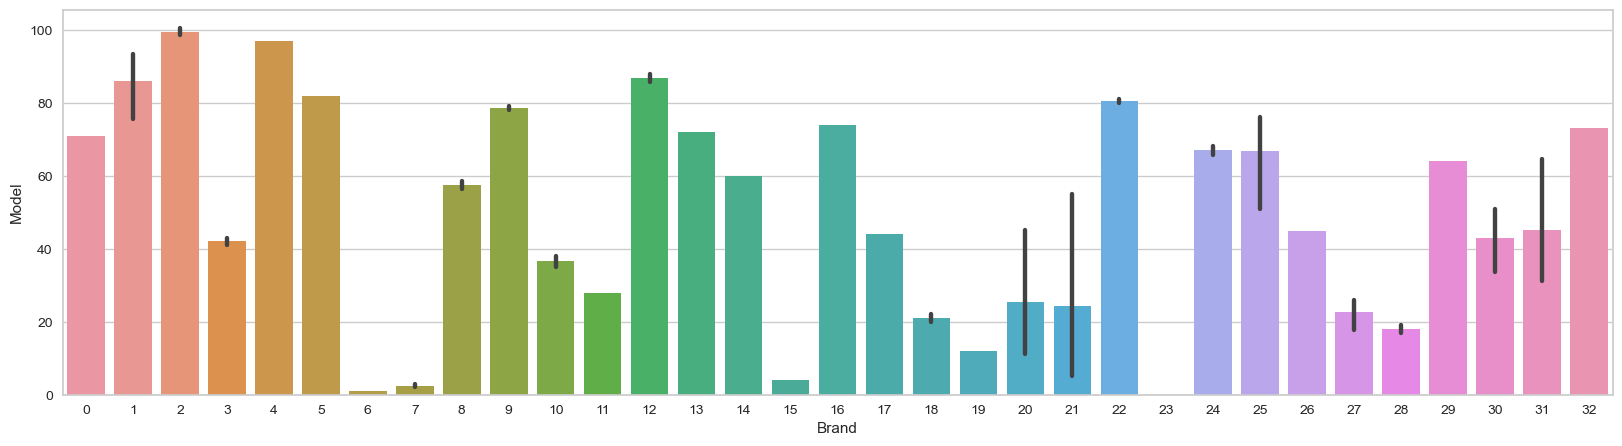

In [365]:
plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y = 'Model',data = df)
plt.show()

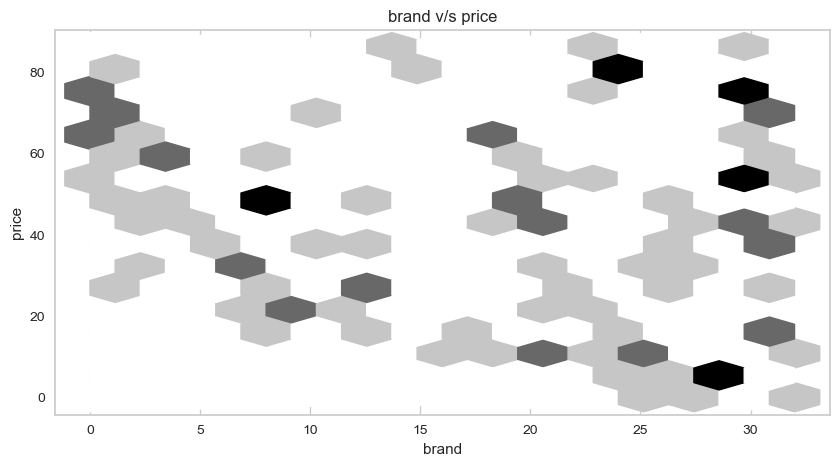

In [366]:
plt.figure(figsize=(10,5))
plt.hexbin(x=df['Brand'], y = df['PriceEuro'],gridsize=14)
plt.title("brand v/s price")
#plt.xticks(df['Brand'].cat.categories)
plt.grid(axis = 'y')
plt.xlabel("brand")
plt.ylabel("price")
plt.show()

In [367]:
#df['Brand'] = pd.Categorical.from_codes(df['Brand'], categories=df['Brand'].cat.categories)


In [368]:
#sns.pairplot(df)

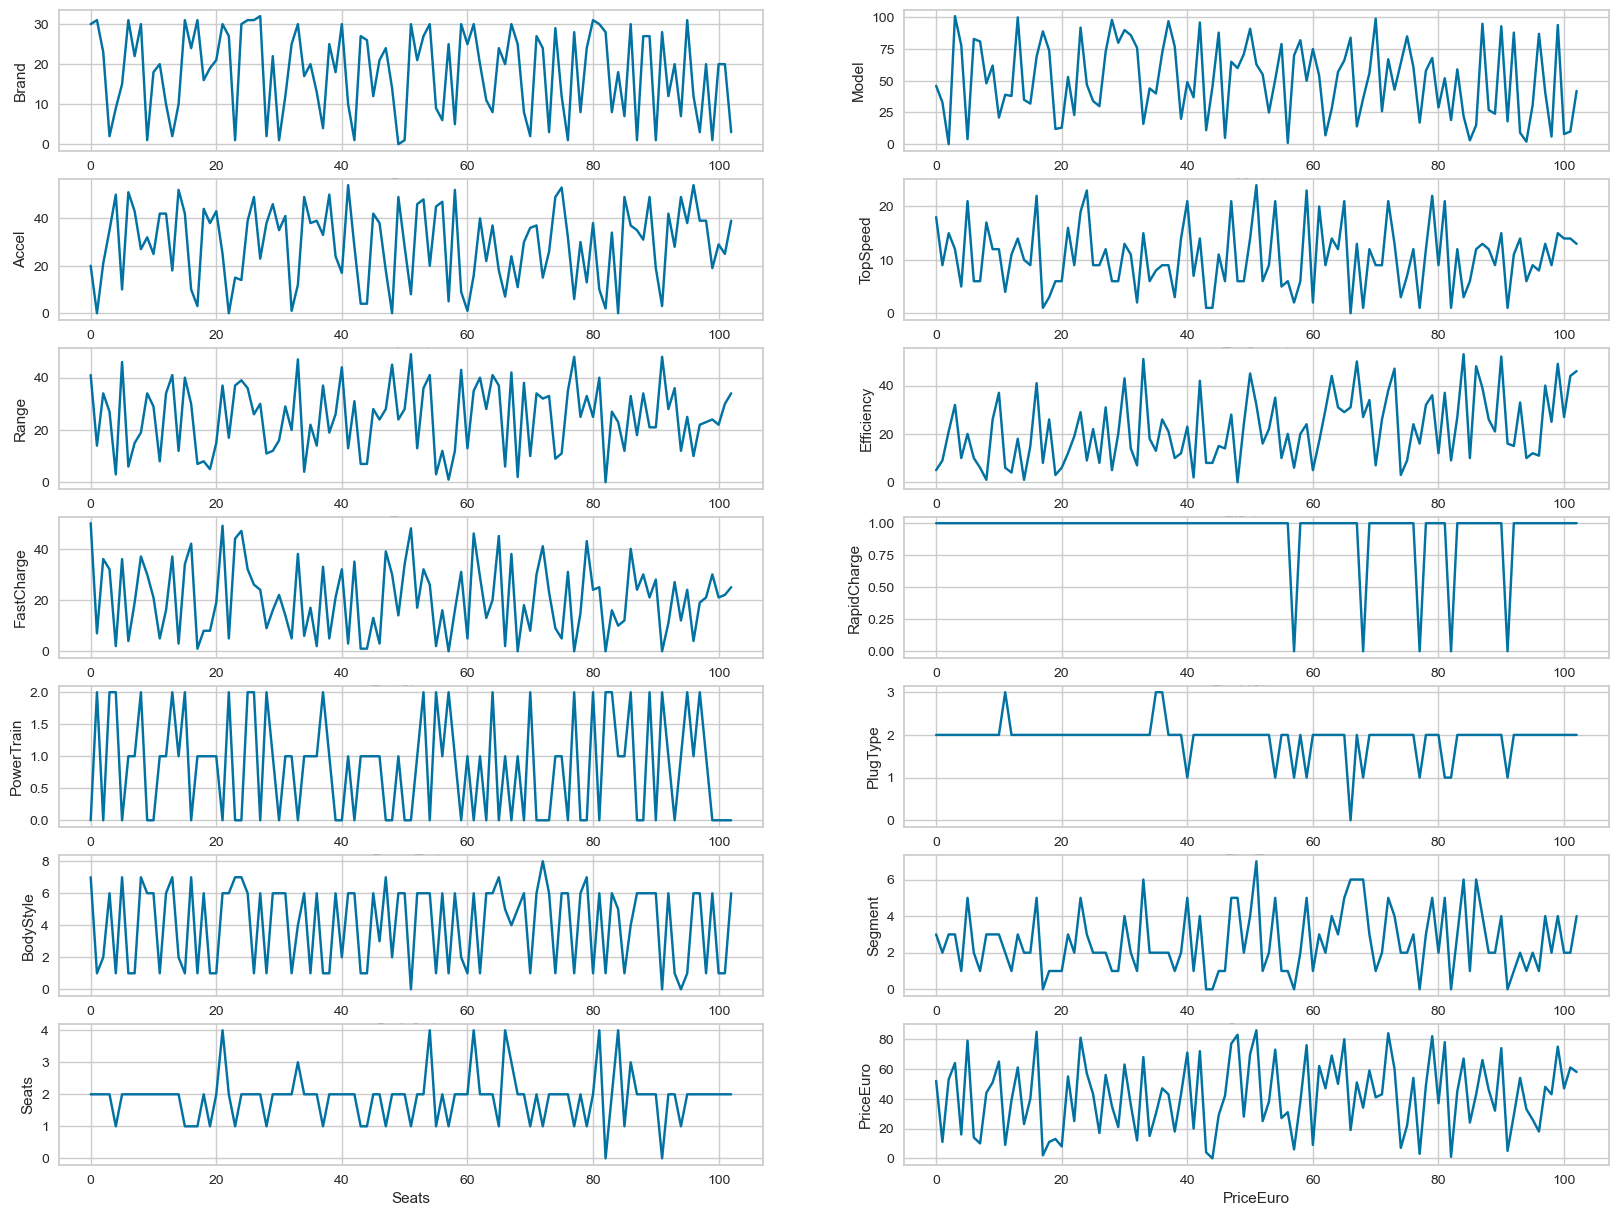

In [369]:
plt.figure(figsize=(20,15))
for i,col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(7, 2, i+1)
        sns.lineplot(df[col],ax=ax)
        plt.xlabel(col)
plt.show() 

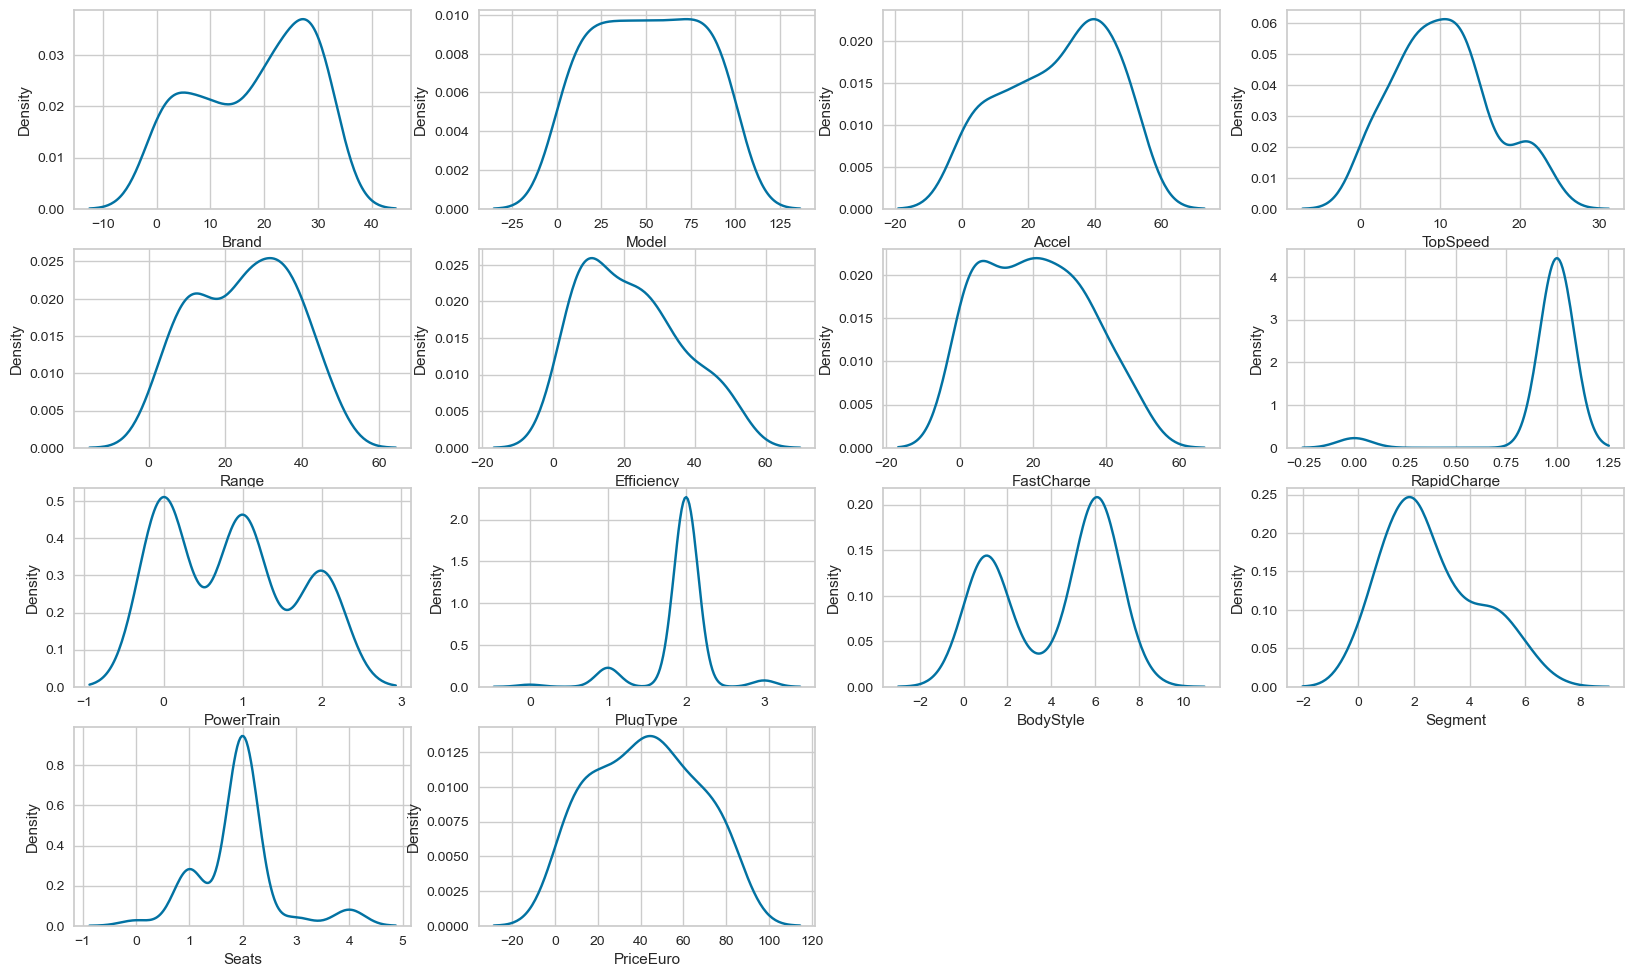

In [370]:
plt.figure(figsize=(20,15))
for i,col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(5, 4, i+1)
        sns.kdeplot(df[col],ax=ax)
        plt.xlabel(col)
plt.show() 

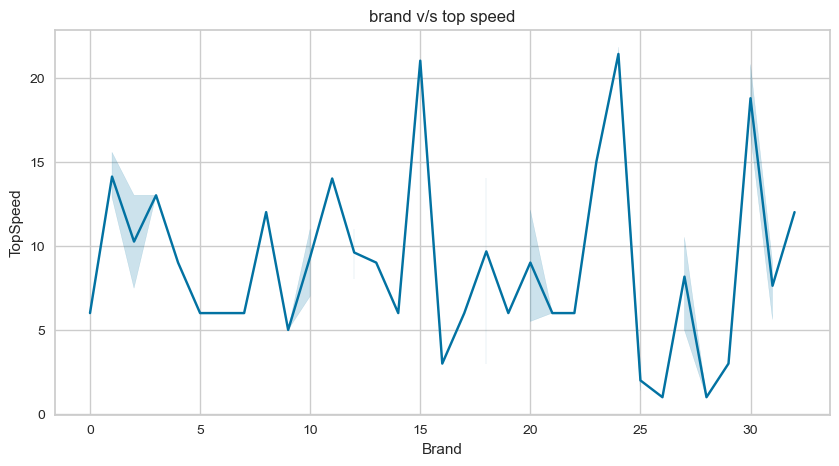

In [371]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Brand',y = 'TopSpeed',data = df)
plt.title("brand v/s top speed")
plt.show()

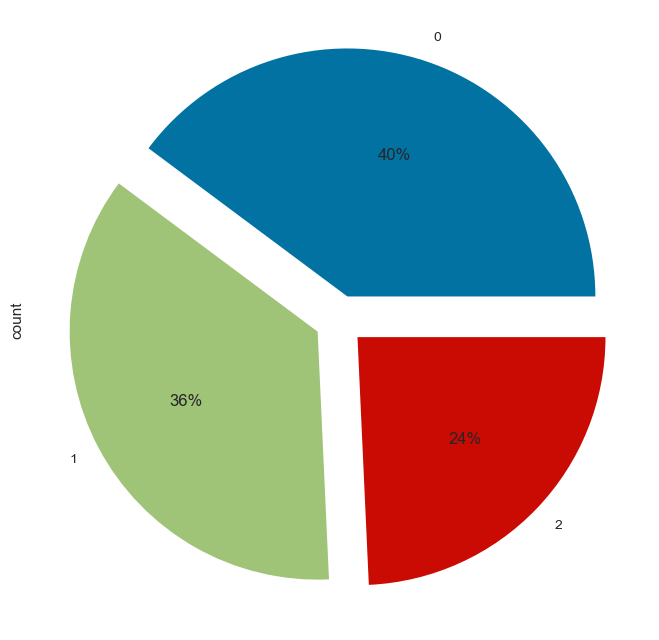

In [372]:
#types of powertrain
df['PowerTrain'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(.1,.1,.1))
plt.show()

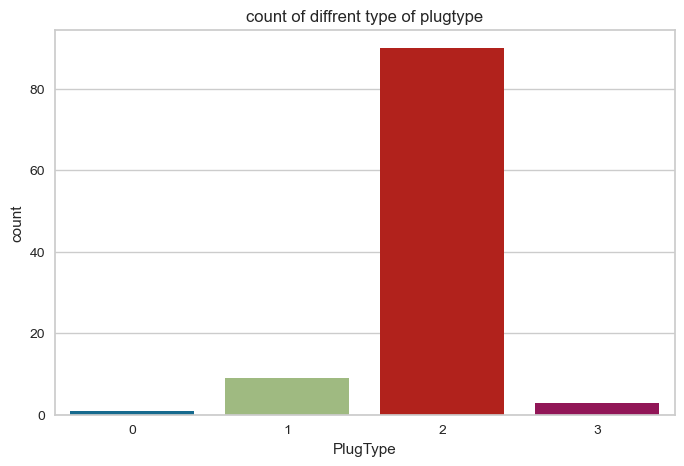

In [373]:

#distribution of plug types
plt.figure(figsize=(8,5))
sns.countplot(x = df['PlugType'])
plt.title("count of diffrent type of plugtype")
plt.show()


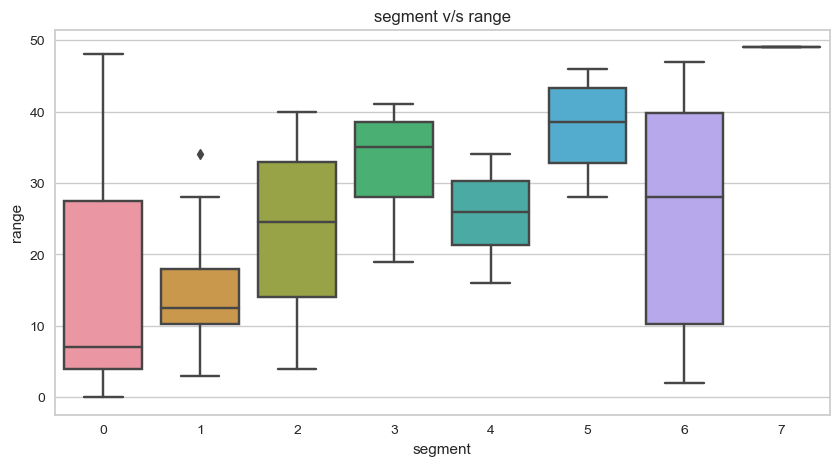

In [374]:
#segment v/s range 
plt.figure(figsize=(10,5))
sns.boxplot(x = 'Segment',y = 'Range' , data = df)
plt.title("segment v/s range")
plt.xlabel("segment")
plt.ylabel("range")
plt.show()

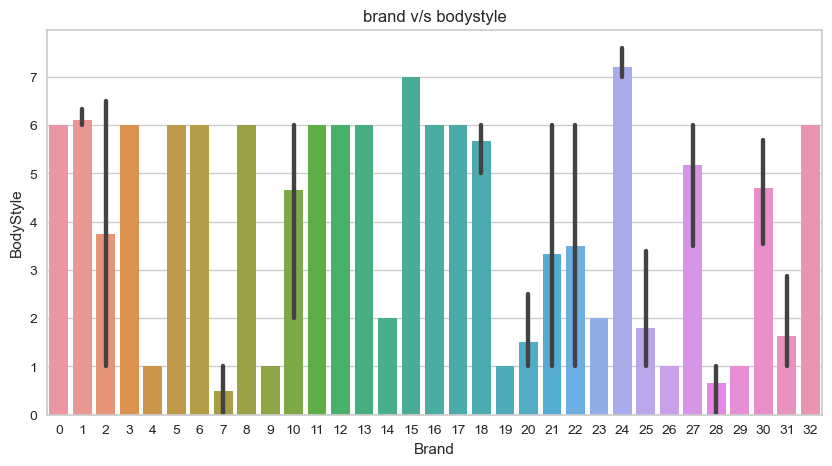

In [375]:
#model v/s bodystyle
plt.figure(figsize=(10,5))
sns.barplot(x = "Brand" , y = "BodyStyle",data=df)
plt.grid(axis = "y",visible=True)
plt.title("brand v/s bodystyle")
plt.show()

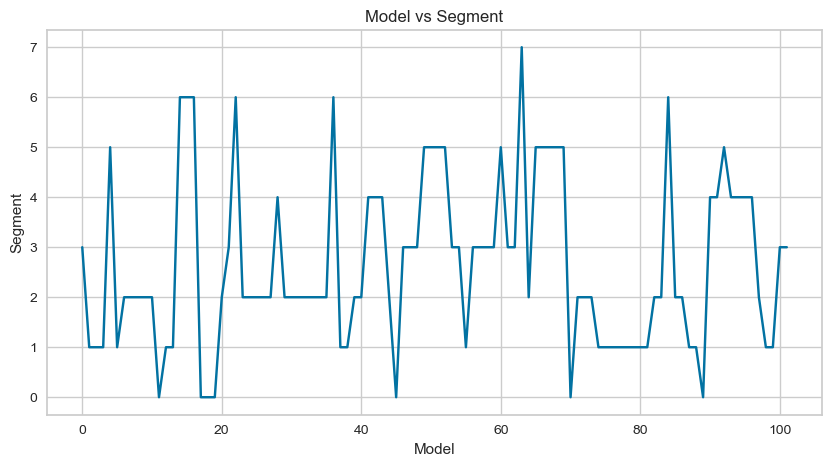

In [376]:
#model v/s segment
plt.figure(figsize=(10,5))
sns.lineplot(x = 'Model',y = 'Segment',data =df)
plt.title('Model vs Segment')
plt.show()

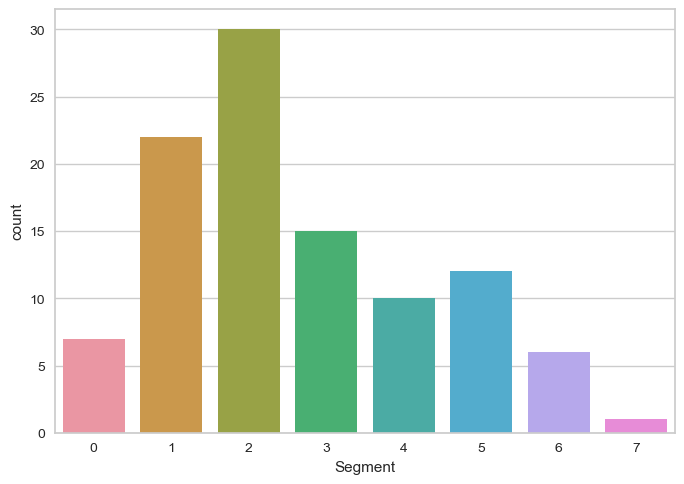

In [377]:
#segment v/s price
sns.countplot(x = "Segment",data =df)
plt.show()

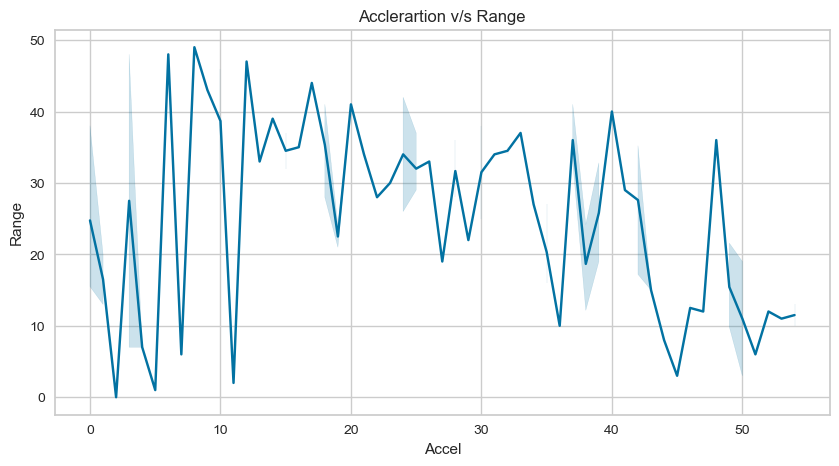

In [378]:
#accelaration v/s range
plt.figure(figsize = (10,5))
sns.lineplot(x = df['Accel'],y =df['Range'])
plt.title("Acclerartion v/s Range")
plt.show()

<Figure size 1000x500 with 0 Axes>

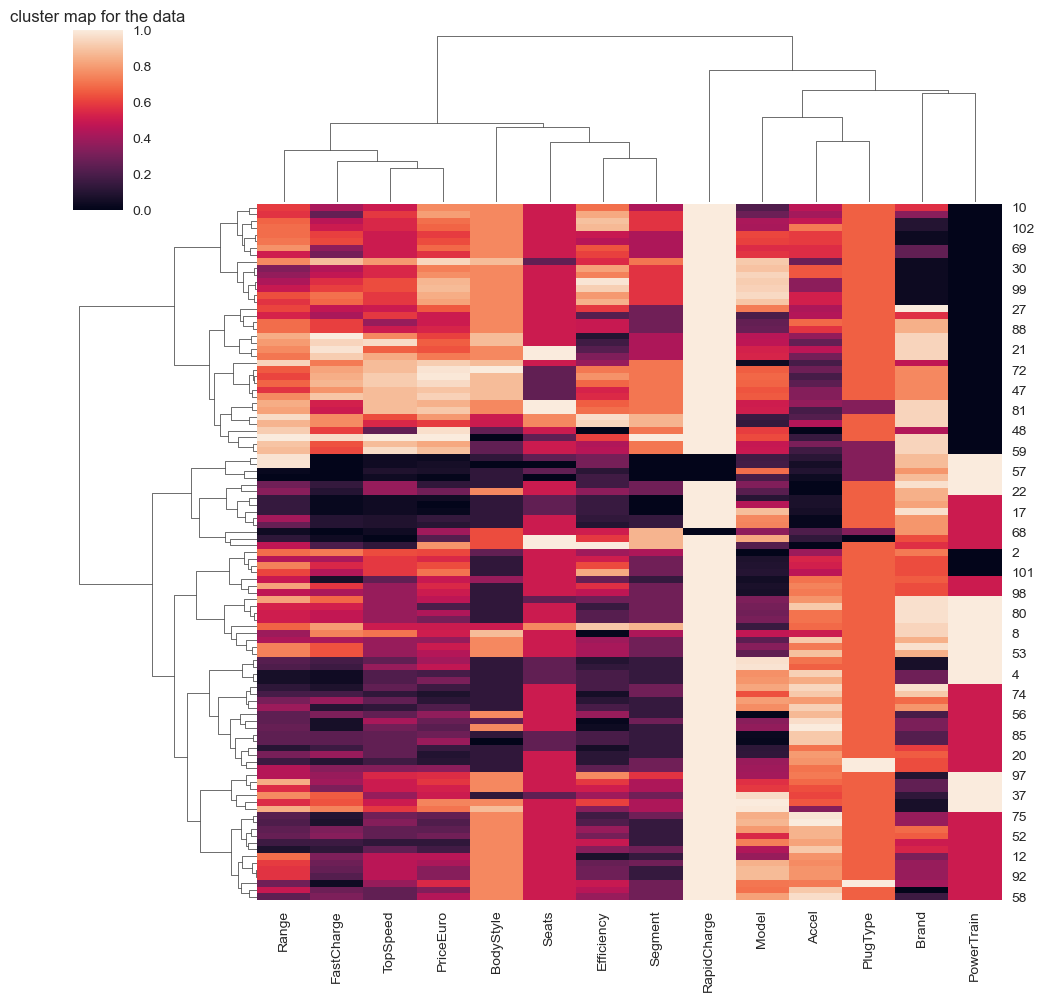

In [379]:
plt.figure(figsize=(10,5))
sns.clustermap(df,standard_scale=1,method='ward',metric = 'euclidean')
plt.title("cluster map for the data")
plt.show()
#wards method-->  it looks at cluster analysis as an analysis of variance problem instead of using distance metrics or measures of association.

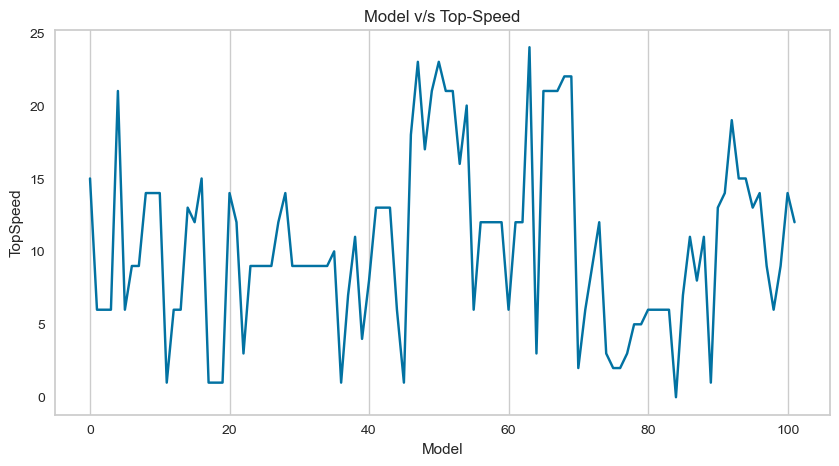

In [380]:
#model v/s top speed
plt.figure(figsize=(10,5))
sns.lineplot(x = 'Model' , y = 'TopSpeed',data = df)
plt.title("Model v/s Top-Speed")
plt.grid(axis = 'y')
plt.show()

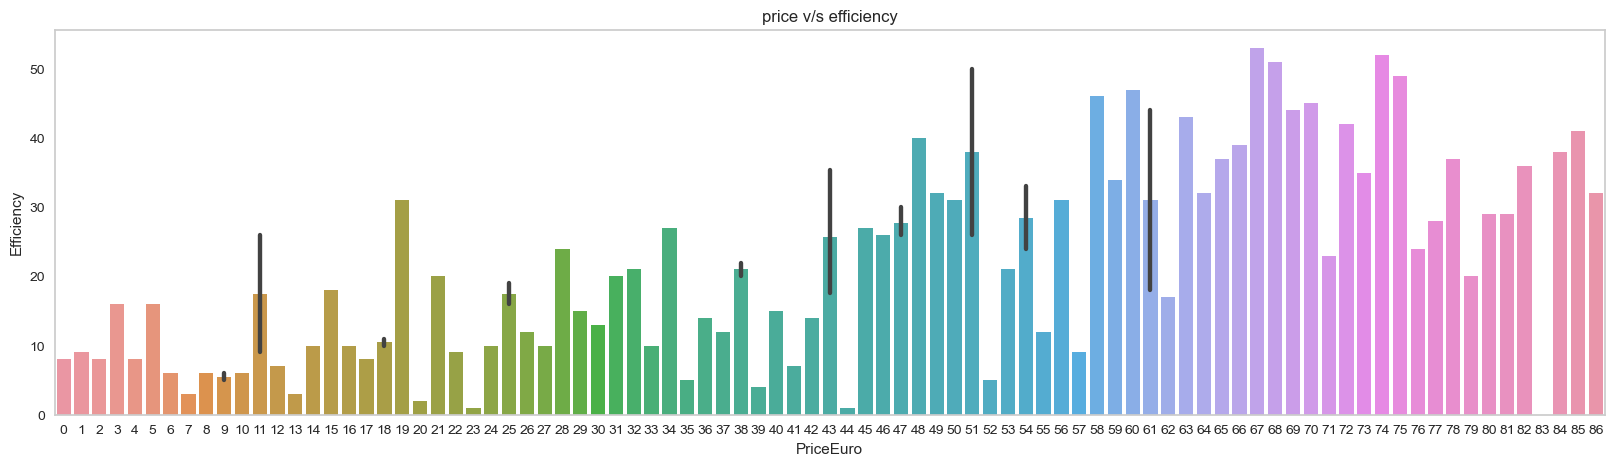

In [381]:
#price v/s efficiency
plt.figure(figsize=(20,5))
sns.barplot(x = df['PriceEuro'],y = df['Efficiency'])
plt.title("price v/s efficiency")
plt.grid(axis = 'y')
plt.show()

In [382]:
X = df.iloc[:, [3, 4]].values

/Users/rohithr/tensorflow-test/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rohithr/tensorflow-test/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rohithr/tensorflow-test/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rohithr/tensorflow-test/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

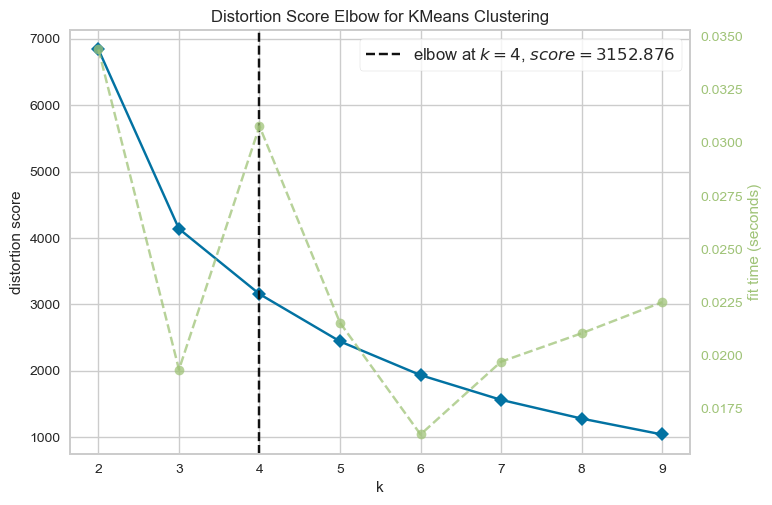

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [383]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
m = KMeans()
visualizer = KElbowVisualizer(m, k=(2, 10)).fit(X)
visualizer.show()
 

In [384]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)    

/Users/rohithr/tensorflow-test/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


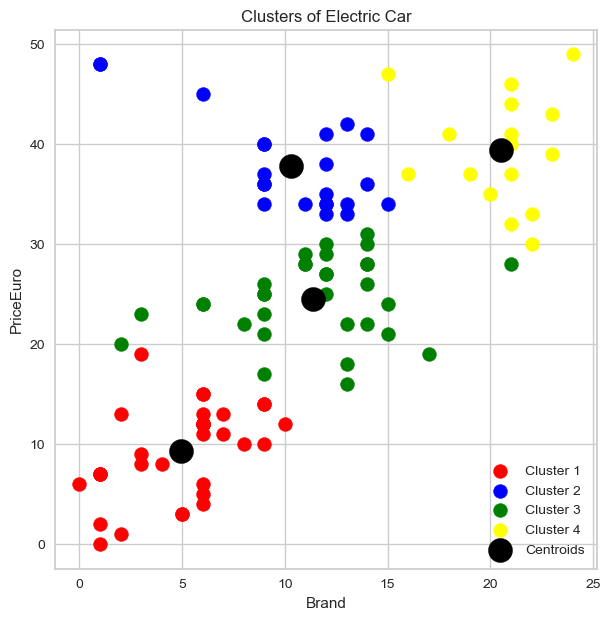

In [385]:

# Visualising the clusters
plt.figure(figsize=(7,7))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters of Electric Car')
plt.xlabel('Brand')
plt.ylabel('PriceEuro')
plt.legend()
plt.show()

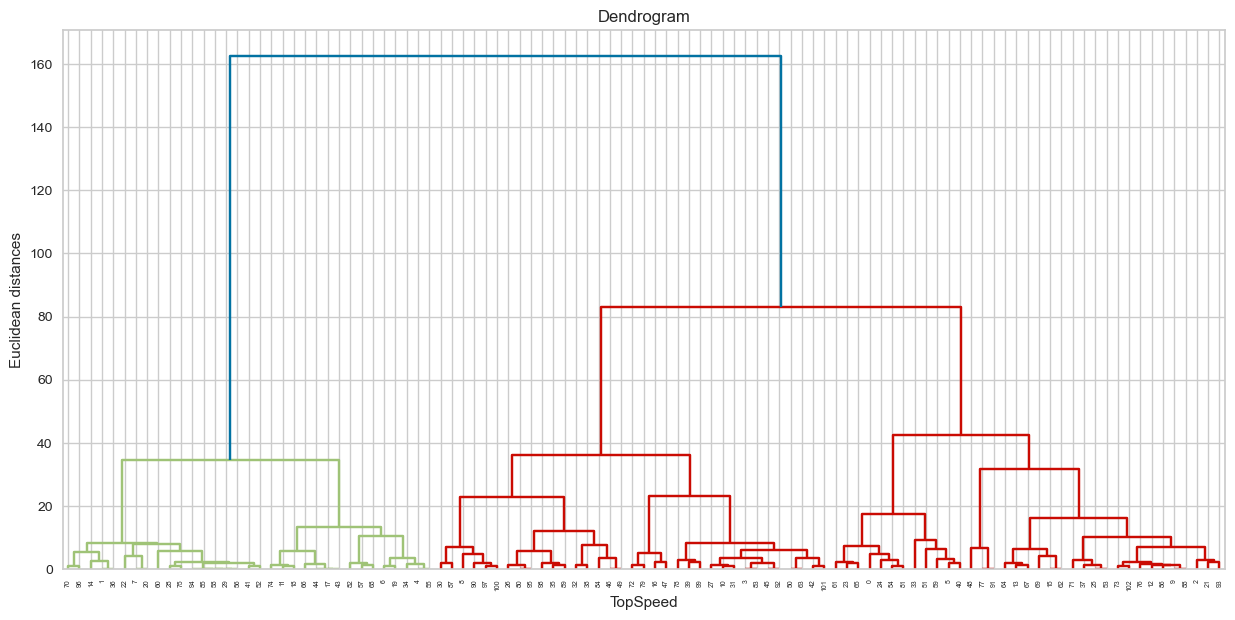

In [386]:
#agglomarative clustering
plt.figure(figsize=(15,7))
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('TopSpeed')
plt.ylabel('Euclidean distances')
plt.show()